In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Import
Hotel = pd.read_csv("~/Desktop/DM/hotel_bookings.csv")

In [189]:
# Data Structure 
print(Hotel.head())
print(Hotel.shape)
print(Hotel.info())
print(Hotel.describe())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

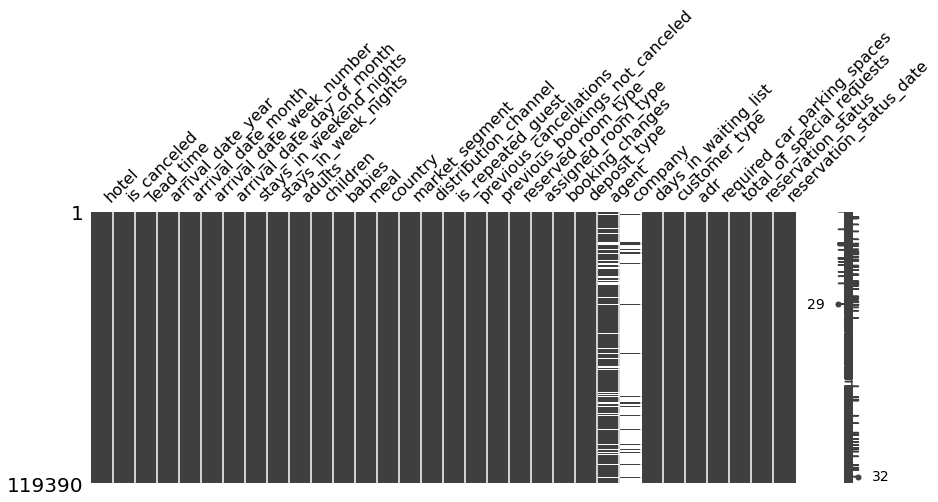

In [190]:
# Clean missing values
print(Hotel.isna().sum())
msno.matrix(Hotel, figsize=(14, 5))

In [191]:
Hotel['children'].fillna(0, inplace=True)

# Replacing undefined at meal column as SC .Both means no meal package
Hotel['meal'].replace('Undefined','SC', inplace=True)
print(Hotel['meal'].unique())

# Dropping some columns with high missing values (agent, company, and reservation_status_date)
Hotel.drop(['agent', 'company', 'reservation_status_date'], axis=1, inplace=True)

['BB' 'FB' 'HB' 'SC']


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

<AxesSubplot:>

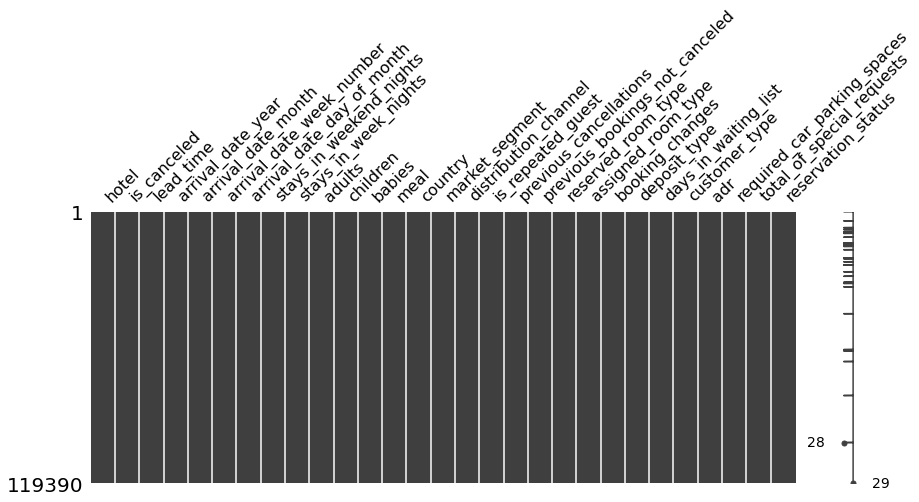

In [192]:
# Clean missing values
print(Hotel.isna().sum())
msno.matrix(Hotel, figsize=(14, 5))

In [193]:
# Creating two new columns to calculate total number of days stayed and total cost
Hotel['stay_nights_total'] = Hotel['stays_in_weekend_nights'] + Hotel['stays_in_week_nights']
Hotel['stay_cost_total'] = Hotel['adr'] * Hotel['stay_nights_total']

In [194]:
import plotly.graph_objects as go
from ipywidgets import interact

numeric_cols = Hotel.select_dtypes(include=np.number).columns.tolist()
column_mapping = {'adr': 'Average Daily Rate'}

@interact
def box_plot(variable=numeric_cols):
    display_name = column_mapping.get(variable, variable)
    
    fig = go.Figure()
    fig.add_trace(go.Box(y=Hotel[variable], name=display_name))
    fig.update_layout(title=f'Boxplot of {display_name}', xaxis_title='Variable', yaxis_title='Value', 
                      autosize=False, width=500, height=400, margin=dict(l=50, r=50, b=50, t=50, pad=4))
    fig.show()


interactive(children=(Dropdown(description='variable', options=('is_canceled', 'lead_time', 'arrival_date_year…

In [195]:
import seaborn as sns
from ipywidgets import interact

categorical_cols = Hotel.select_dtypes(include=['object', 'category']).columns.tolist()

@interact
def count_plot(variable=categorical_cols):
    plt.figure(figsize=(10,6))
    sns.countplot(x=variable, data=Hotel)
    plt.xticks(rotation=90)
    plt.title(f'Count plot of {variable}', fontsize=15)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('hotel', 'arrival_date_month', 'meal', 'countr…

In [196]:
#Treating outliers (adr)
Q1 = Hotel['adr'].quantile(0.25)
Q3 = Hotel['adr'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = Hotel[(Hotel['adr'] < lower_bound) | (Hotel['adr'] > upper_bound)]
print(f"Number of outliers in 'adr': {outliers.shape[0]}")

mean_adr = Hotel['adr'].mean()
Hotel.loc[(Hotel['adr'] < lower_bound) | (Hotel['adr'] > upper_bound), 'adr'] = mean_adr


Number of outliers in 'adr': 3793


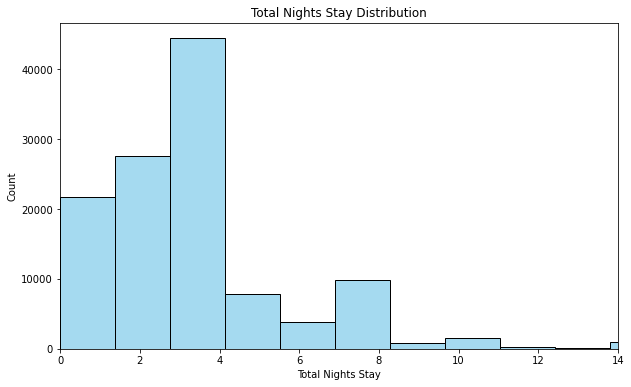

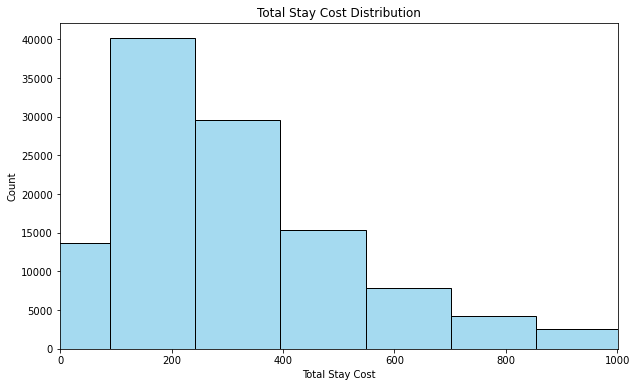

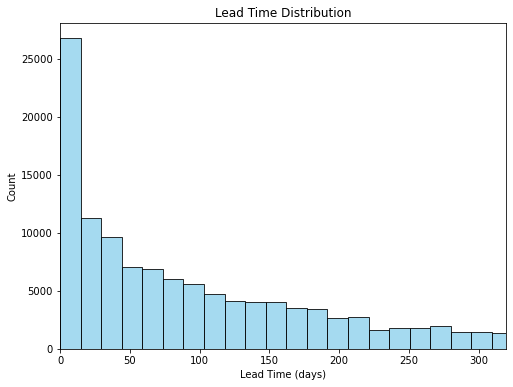

In [197]:
# For 'stay_nights_total'
plt.figure(figsize=(10,6))
sns.histplot(Hotel['stay_nights_total'], bins=50, color="skyblue")
plt.title("Total Nights Stay Distribution")
plt.xlabel("Total Nights Stay")
plt.xlim([0, Hotel['stay_nights_total'].quantile(0.99)]) 
plt.show()

# For 'stay_cost_total'
plt.figure(figsize=(10,6))
sns.histplot(Hotel['stay_cost_total'], bins=50, color="skyblue")
plt.title("Total Stay Cost Distribution")
plt.xlabel("Total Stay Cost")
plt.xlim([0, Hotel['stay_cost_total'].quantile(0.95)])  
plt.show()

# For 'lead_time'
plt.figure(figsize=(8,6))
sns.histplot(Hotel['lead_time'], bins=50, color="skyblue")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.xlim([0, Hotel['lead_time'].quantile(0.95)])  
plt.show()

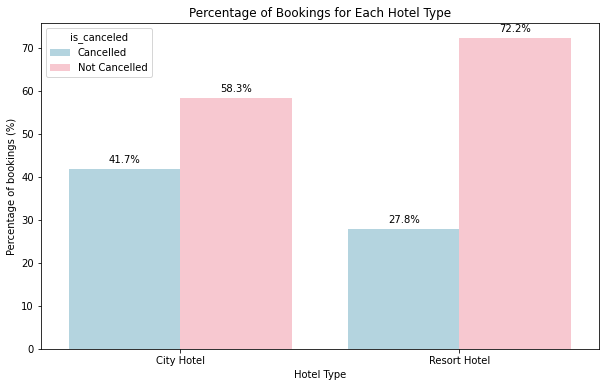

In [211]:
# Compute the counts and normalize to compute percentages
counts = (Hotel
          .replace({'is_canceled': mapping_dict})
          .groupby(['hotel'])['is_canceled']
          .value_counts(normalize=True)
          .rename('percentage')
          .mul(100)
          .reset_index()
          .sort_values('is_canceled'))

plt.figure(figsize=(10,6))
ax = sns.barplot(x="hotel", y="percentage", hue="is_canceled", data=counts, palette={'Cancelled': 'lightblue', 'Not Cancelled': 'pink'})
plt.title("Percentage of Bookings for Each Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Percentage of bookings (%)")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


/var/folders/tw/9jt5jt1j495_j47twr1_vdpm0000gn/T/ipykernel_86320/900453414.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



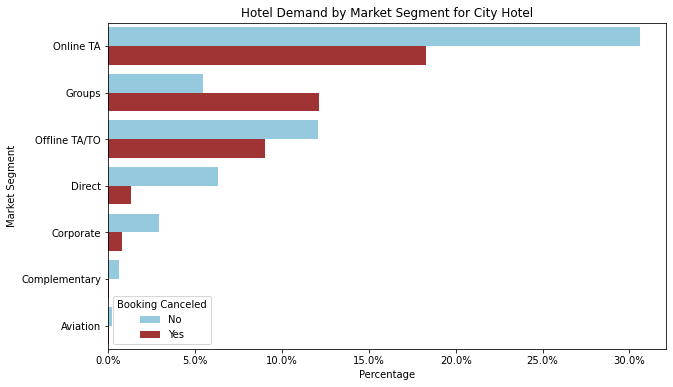

/var/folders/tw/9jt5jt1j495_j47twr1_vdpm0000gn/T/ipykernel_86320/900453414.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



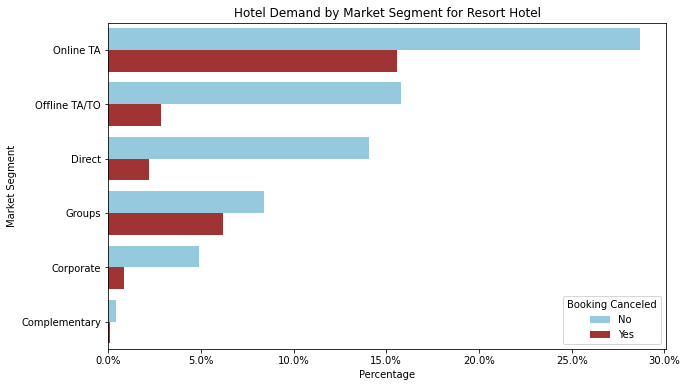

In [199]:
import matplotlib.ticker as mtick

#For 'market segment'

df_market_segment = Hotel[Hotel['market_segment'] != 'Undefined']
grouped = df_market_segment.groupby(['hotel', 'market_segment', 'is_canceled']).size().reset_index(name='counts')


total = grouped.groupby(['hotel']).counts.sum().reset_index(name='total')
grouped = pd.merge(grouped, total, on='hotel')
grouped['ratio'] = grouped['counts'] / grouped['total']
grouped['is_canceled'] = grouped['is_canceled'].replace({0: 'No', 1: 'Yes'})


hotel_types = grouped['hotel'].unique()

# Create a separate plot for each hotel type
for hotel in hotel_types:
    data = grouped[grouped['hotel']==hotel]
    data.sort_values('ratio', ascending=False, inplace=True)
    plt.figure(figsize=(10,6))
    sns.barplot(y='market_segment', x='ratio', hue='is_canceled', 
                data=data, orient='h', palette=["skyblue", "firebrick"], ci=None, order=data['market_segment'].unique())
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.title(f"Hotel Demand by Market Segment for {hotel}")
    plt.xlabel("Percentage")
    plt.ylabel("Market Segment")
    plt.legend(title='Booking Canceled')
    plt.show()


In [200]:
import plotly.express as px

country_counts = Hotel['country'].value_counts().reset_index()
country_counts.columns = ['country', 'counts']

country_counts['percentage'] = (country_counts['counts'] / country_counts['counts'].sum()) * 100

fig = px.choropleth(country_counts, locations='country',
                    color='percentage', 
                    hover_name='country', 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Booking Numbers by Country in Percentage',
                    labels={'percentage':'Booking Percentage (%)'},
                    projection='natural earth'
                    )

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
)

fig.show()


In [201]:
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_3=country_code).name
    except AttributeError:
        return 'Unknown'
        
top_countries['country'] = top_countries['country'].apply(get_country_name)

print(top_countries)

   country  counts  percentage
0  Unknown   48590   40.865587
1  Unknown   12129   10.200838
2  Unknown   10415    8.759314
3  Unknown    8568    7.205934
4  Unknown    7287    6.128576


In [205]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
Hotel['arrival_date_month'] = pd.Categorical(Hotel['arrival_date_month'], categories=months, ordered=True)

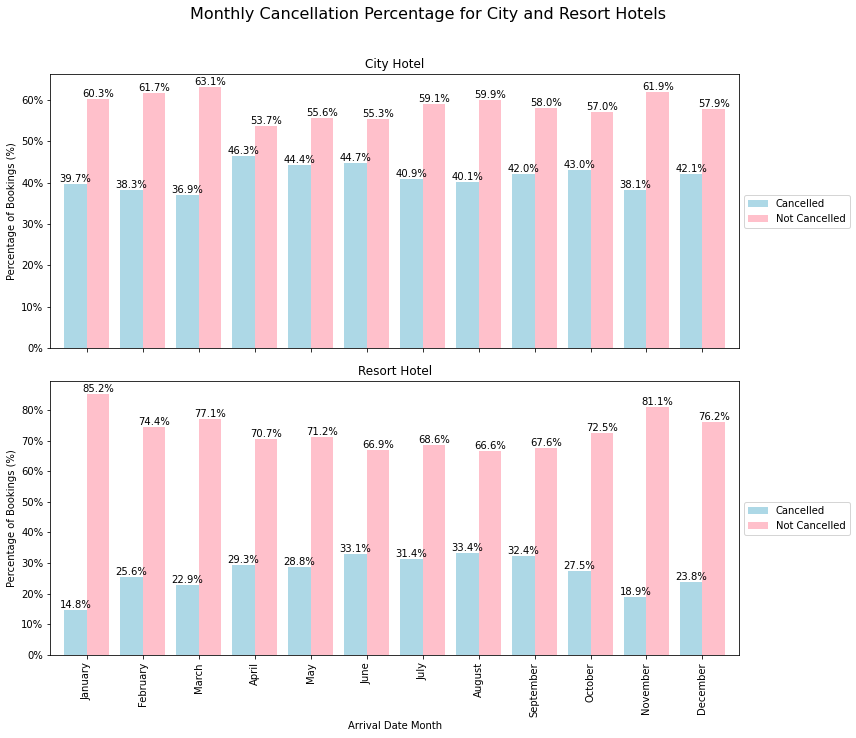

In [206]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.suptitle('Monthly Cancellation Percentage for City and Resort Hotels', fontsize=16, y=1.02)

mapping_dict = {1: 'Cancelled', 0: 'Not Cancelled'}

for i, hotel_type in enumerate(['City Hotel', 'Resort Hotel']):
    hotel_data = Hotel[Hotel['hotel'] == hotel_type].copy()  # We use .copy() to avoid SettingWithCopyWarning
    
    hotel_data['is_canceled'] = hotel_data['is_canceled'].replace(mapping_dict)
    
    cancellation_rate = hotel_data.groupby('arrival_date_month')['is_canceled'].value_counts(normalize=True).unstack() * 100

    cancellation_rate.plot(kind='bar', ax=ax[i], color={'Cancelled': 'lightblue', 'Not Cancelled': 'pink'}, width=0.8)
    ax[i].set_title(hotel_type)
    ax[i].set_xlabel('Arrival Date Month')
    ax[i].set_ylabel('Percentage of Bookings (%)')
    
    fmt = '%.0f%%' 
    yticks = mtick.FormatStrFormatter(fmt)
    ax[i].yaxis.set_major_formatter(yticks)

    for p in ax[i].patches:
        ax[i].annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


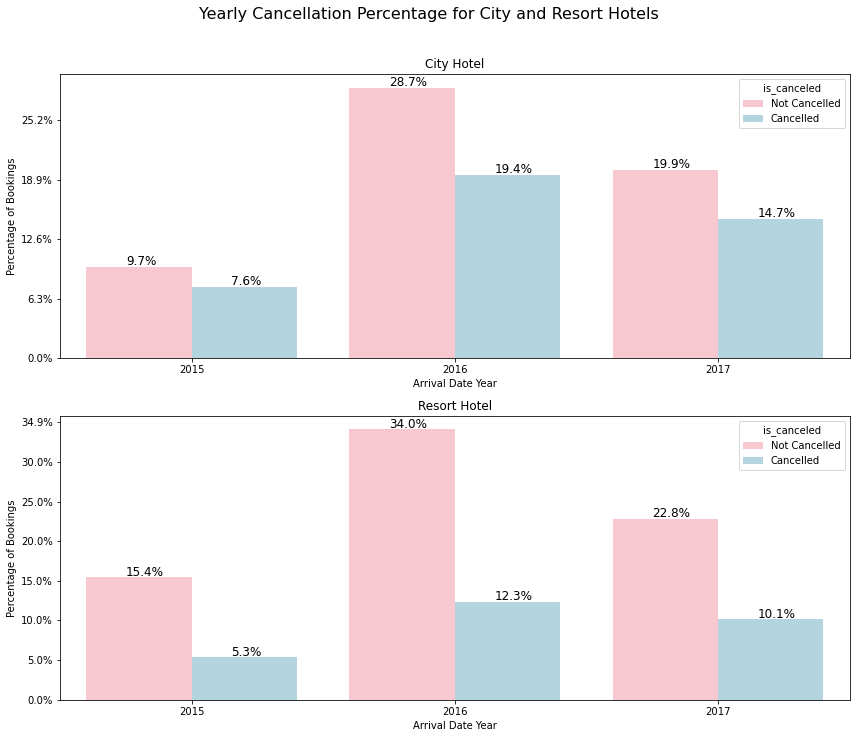

In [209]:
mapping_dict = {1: 'Cancelled', 0: 'Not Cancelled'}

def show_percentage_on_bars(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.002 * total
        ax.annotate(percentage, (x, y), size = 12)

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=False) 
plt.suptitle('Yearly Cancellation Percentage for City and Resort Hotels', fontsize=16, y=1.02)

city_hotel = Hotel[Hotel['hotel'] == 'City Hotel'].copy()
city_hotel['is_canceled'] = city_hotel['is_canceled'].replace(mapping_dict)

total_city = len(city_hotel)
ax1 = sns.countplot(data=city_hotel, x='arrival_date_year', hue='is_canceled', palette={'Cancelled': 'lightblue', 'Not Cancelled': 'pink'}, ax=ax[0])
show_percentage_on_bars(ax1, total_city)
ax[0].set_title('City Hotel')
ax[0].set_xlabel('Arrival Date Year')
ax[0].set_ylabel('Percentage of Bookings')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_city))

resort_hotel = Hotel[Hotel['hotel'] == 'Resort Hotel'].copy()
resort_hotel['is_canceled'] = resort_hotel['is_canceled'].replace(mapping_dict)

total_resort = len(resort_hotel)
ax2 = sns.countplot(data=resort_hotel, x='arrival_date_year', hue='is_canceled',palette={'Cancelled': 'lightblue', 'Not Cancelled': 'pink'},ax=ax[1])
show_percentage_on_bars(ax2, total_resort)
ax[1].set_title('Resort Hotel')
ax[1].set_xlabel('Arrival Date Year')
ax[1].set_ylabel('Percentage of Bookings')
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total_resort))

plt.tight_layout()
plt.show()


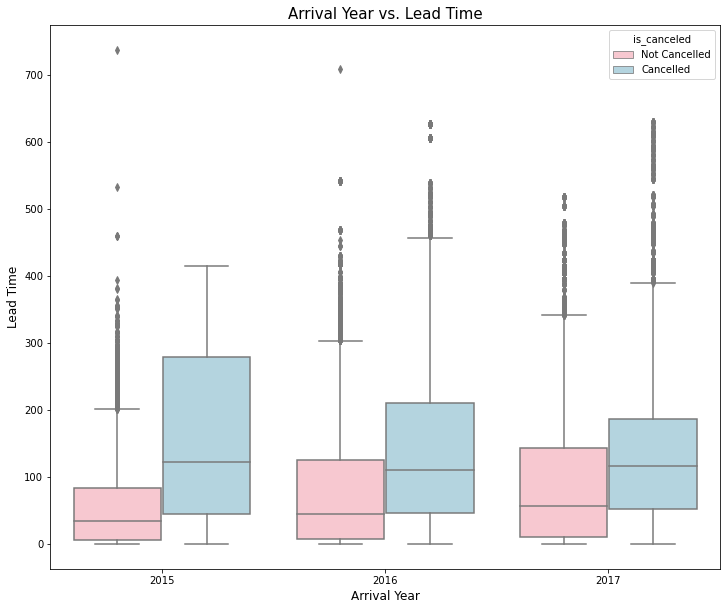

In [210]:
#Boxplot for Arrival Year vs Lead Time 
plt.figure(figsize=(12, 10))

hotel_data = Hotel.copy()
hotel_data['is_canceled'] = hotel_data['is_canceled'].replace(mapping_dict)

sns.boxplot(data=hotel_data, x='arrival_date_year', y='lead_time', hue='is_canceled', palette={'Cancelled': 'lightblue', 'Not Cancelled': 'pink'})
plt.title('Arrival Year vs. Lead Time', fontsize=15)
plt.xlabel('Arrival Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)
plt.show()